In [ ]:
from google.colab import drive
drive.mount('/content/driver', force_remount=True)

Mounted at /content/driver


In [ ]:
# path = '/content/driver/My Drive/Colab Notebooks/finaltest/SVR/datacsv/k62/'
path = '/content/driver/My Drive/Colab Notebooks/alldatacsv/*.csv'
#file du lieu train test tot nhat moi dong 1 file
pathAC = '/content/driver/My Drive/project3model/AC/'

fileTest25 = pathAC+'AC_25_filetest.txt'
fileTrain25 = pathAC+'AC_25_filetrain.txt'

fileTest1to25 = pathAC+'AC_1to25_filetest.txt'
fileTrain1to25 = pathAC+'AC_1to25_filetrain.txt'

fileTest50 = pathAC+'AC_50_filetest.txt'
fileTrain50 = pathAC+'AC_50_filetrain.txt'

fileTest1to50 = pathAC+'AC_1to50_filetest.txt'
fileTrain1to50 = pathAC+'AC_1to50_filetrain.txt'

modelDir25 = pathAC+"AC_25_trained_model.joblib.dat"
modelDir1to25 = pathAC+"AC_1to25_trained_model.joblib.dat"
modelDir50 = pathAC+"AC_50_trained_model.joblib.dat"
modelDir1to50 = pathAC+"AC_1to50_trained_model.joblib.dat"

In [ ]:
from glob import glob
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
 
path_train = path
files = glob(path_train)

In [ ]:
from random import shuffle

def randomize_files(files):
  shuffle(files)
randomize_files(files)

def printFileTest(file_test, filewrite):
  f = open(filewrite, "w")
  for i in file_test:
    f.write(i)
    f.write("\n")
  f.close()
def printFileTrain(file_train, filewrite):
  f = open(filewrite, "w")
  for i in file_train:
    f.write(i)
    f.write("\n")
  f.close()

In [ ]:
from math import floor

def get_training_and_testing_sets(file_list):
    randomize_files(file_list)
    split = 0.75
    split_index = floor(len(file_list) * split)
    training = file_list[:split_index]
    testing = file_list[split_index:]
    return training, testing

In [ ]:
from sklearn.metrics import explained_variance_score
def mean_absolute_percentage_error(y_true, y_pred, start_of_test):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return explained_variance_score(y_true, y_pred)

def mean_absolute_percentage_error_25(y_true, y_pred, start_of_test):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
 
    y_true_25 = np.array([])
    y_pred_25 = np.array([])
    for element in range(count_test):
        t = start_of_test[element] + math.floor(len_of_test[element] / 4)
        y_true_25 = np.concatenate((y_true_25, np.array([ y_true[ int(t.item()) ] ])))
        y_pred_25 = np.concatenate((y_pred_25, np.array([ y_pred[ int(t.item()) ] ])))
    # return np.mean(np.abs((y_true_25 - y_pred_25) / y_true_25)) * 100
    return explained_variance_score(y_true_25, y_pred_25)
 
def mean_absolute_percentage_error_1_to_25(y_true, y_pred, start_of_test):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
 
    y_true_1_to_25 = np.array([])
    y_pred_1_to_25 = np.array([])
    for element in range(count_test):
        t = start_of_test[element] + math.floor(len_of_test[element] / 4)
        for t_value in range( int(start_of_test[element].item()), int(t.item()) ):
            y_true_1_to_25 = np.concatenate((y_true_1_to_25, np.array([ y_true[ t_value ] ])))
            y_pred_1_to_25 = np.concatenate((y_pred_1_to_25, np.array([ y_pred[ t_value ] ])))
    # return np.mean(np.abs((y_true_1_to_25 - y_pred_1_to_25) / y_true_1_to_25)) * 100
    return explained_variance_score(y_true_1_to_25, y_pred_1_to_25)
 
def mean_absolute_percentage_error_50(y_true, y_pred, start_of_test):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
 
    y_true_50 = np.array([])
    y_pred_50 = np.array([])
    for element in range(count_test):
        t = start_of_test[element] + math.floor(len_of_test[element] / 2)
        y_true_50 = np.concatenate((y_true_50, np.array([ y_true[ int(t.item()) ] ])))
        y_pred_50 = np.concatenate((y_pred_50, np.array([ y_pred[ int(t.item()) ] ])))
    # return np.mean(np.abs((y_true_50 - y_pred_50) / y_true_50)) * 100
    return explained_variance_score(y_true_50, y_pred_50)

def mean_absolute_percentage_error_1_to_50(y_true, y_pred, start_of_test):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
 
    y_true_1_to_50 = np.array([])
    y_pred_1_to_50 = np.array([])
    for element in range(count_test):
        t = start_of_test[element] + math.floor(len_of_test[element] / 2)
        for t_value in range( int(start_of_test[element].item()), int(t.item()) ):
            y_true_1_to_50 = np.concatenate((y_true_1_to_50, np.array([ y_true[ t_value ] ])))
            y_pred_1_to_50 = np.concatenate((y_pred_1_to_50, np.array([ y_pred[ t_value ] ])))
    # return np.mean(np.abs((y_true_1_to_50 - y_pred_1_to_50) / y_true_1_to_50)) * 100
    return explained_variance_score(y_true_1_to_50, y_pred_1_to_50)

In [ ]:
from glob import glob
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV
from joblib import dump
from sklearn.svm import SVR 
from joblib import load
import math

In [ ]:
maxmape25 = 0
maxmape1to25 = 0
maxmape50=0
maxmape1to50=0
for i in range(200):
  file_train, file_test = get_training_and_testing_sets(files)
  li=[]
  for filename in file_train:
    df = pd.read_csv(filename, index_col = None, header = 0)
    li.append(df)
  dataFrame = pd.concat(li, axis = 0, ignore_index = True)
  X_train, y_train = dataFrame.iloc[:, [2, 3]], dataFrame.iloc[:, 7]

  li2 = []
  for filename in file_test:
      df = pd.read_csv(filename, index_col = None, header = 0)
      li2.append(df)
  
  dataFrame2 = pd.concat(li2, axis = 0, ignore_index = True)
  X_test, y_test = dataFrame2.iloc[:, [2, 3]], dataFrame2.iloc[:, 7]

  svr = SVR()
  
  parameters = {}
  parameters['kernel'] = ['rbf']
  parameters['C'] = [1e-1, 1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]
  parameters['gamma'] = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3]
  
  
  grids = GridSearchCV(svr,parameters,cv=2)
  
  grids.fit(X_train, y_train)

  preds = grids.predict(X_test)
  
  # Thông tin test
  y_test_ward = np.concatenate((y_test, np.array([0])))
  count_test = 0
  len_of_test = np.array([])
  tmp = 1
  for element in range(len(y_test_ward) - 1):
      if y_test_ward[element] != y_test_ward[element + 1]:
          count_test = count_test + 1
          len_of_test = np.concatenate((len_of_test, np.array([tmp])))
          tmp = 1
      else:
          tmp = tmp + 1
  start_of_test = np.array([0])
  for element in range(1, count_test):
      start_of_test = np.concatenate((start_of_test, np.array([ len_of_test[element - 1] + start_of_test[element - 1] ])))


  mape = mean_absolute_percentage_error(y_test, preds, start_of_test)
  mape25 = mean_absolute_percentage_error_25(y_test, preds, start_of_test)
  mape1to25 = mean_absolute_percentage_error_1_to_25(y_test, preds, start_of_test)
  mape50 = mean_absolute_percentage_error_50(y_test, preds, start_of_test)
  mape1to50 = mean_absolute_percentage_error_1_to_50(y_test, preds, start_of_test)


  print(i)

  if (mape25 > maxmape25 ):
    maxmape25 = mape25
    dump(grids, modelDir25)
    printFileTest(file_test, fileTest25)
    printFileTrain(file_train, fileTrain25)
    print('grids.best_params_:')
    print(grids.best_params_)

  if (mape1to25 > maxmape1to25 ):
    maxmape1to25 = mape1to25
    dump(grids, modelDir1to25)
    printFileTest(file_test, fileTest1to25)
    printFileTrain(file_train, fileTrain1to25)
    print('grids.best_params_:')
    print(grids.best_params_)

  if (mape50 > maxmape50 ):
    maxmape50 = mape50
    dump(grids, modelDir50)
    printFileTest(file_test, fileTest50)
    printFileTrain(file_train, fileTrain50)
    print('grids.best_params_:')
    print(grids.best_params_)

  if (mape1to50 > maxmape1to50 ):
    maxmape1to50 = mape1to50
    dump(grids, modelDir1to50)
    printFileTest(file_test, fileTest1to50)
    printFileTrain(file_train, fileTrain1to50)
    print('grids.best_params_:')
    print(grids.best_params_)
  
  print("mape25: ", maxmape25)
  print("mape1to25:", maxmape1to25)
  print("mape50:", maxmape50)
  print("mape1to50:", maxmape1to50)
  print("\n")

0
grids.best_params_:
{'C': 10000000.0, 'gamma': 1e-05, 'kernel': 'rbf'}
grids.best_params_:
{'C': 10000000.0, 'gamma': 1e-05, 'kernel': 'rbf'}
grids.best_params_:
{'C': 10000000.0, 'gamma': 1e-05, 'kernel': 'rbf'}
mape25:  0.07849050143681247
mape1to25: 0.045306741591537136
mape50: 0
mape1to50: 0.0359767064985439


1
mape25:  0.07849050143681247
mape1to25: 0.045306741591537136
mape50: 0
mape1to50: 0.0359767064985439


2
grids.best_params_:
{'C': 10000000.0, 'gamma': 1e-07, 'kernel': 'rbf'}
grids.best_params_:
{'C': 10000000.0, 'gamma': 1e-07, 'kernel': 'rbf'}
grids.best_params_:
{'C': 10000000.0, 'gamma': 1e-07, 'kernel': 'rbf'}
mape25:  0.07849050143681247
mape1to25: 0.2244196097965362
mape50: 0.07782875647784349
mape1to50: 0.15710785852812137


3
grids.best_params_:
{'C': 10000000.0, 'gamma': 1e-08, 'kernel': 'rbf'}
mape25:  0.21332730880917627
mape1to25: 0.2244196097965362
mape50: 0.07782875647784349
mape1to50: 0.15710785852812137


4
grids.best_params_:
{'C': 10000000.0, 'gamma': 

In [ ]:
filetrain = open(fileTrain1to50,'r')
filetest = open(fileTest1to50,'r')

li2 = []
for line in filetest: 
    df = pd.read_csv(line.strip(), index_col = None, header = 0)
    li2.append(df)  
dataFrame2 = pd.concat(li2, axis = 0, ignore_index = True)
X_test, y_test = dataFrame2.iloc[:, [2, 3]], dataFrame2.iloc[:, 7] 
print(X_test)
print(y_test)

           XT            AC
0    0.193541  1.437823e+05
1    0.377032  4.439072e+05
2    0.559992  6.657867e+05
3    0.737933  7.516404e+05
4    0.978970  9.400699e+05
..        ...           ...
351  0.919148  3.959298e+07
352  0.919148  3.959298e+07
353  0.999974  3.977664e+07
354  1.000000  3.977764e+07
355  1.000000  3.977764e+07

[356 rows x 2 columns]
0      9.559292e+05
1      9.559292e+05
2      9.559292e+05
3      9.559292e+05
4      9.559292e+05
           ...     
351    3.977764e+07
352    3.977764e+07
353    3.977764e+07
354    3.977764e+07
355    3.977764e+07
Name: TOTAL_AC, Length: 356, dtype: float64


In [ ]:
loaded_model = load(modelDir1to50)
 
preds = loaded_model.predict(X_test)
 
# Thông tin test
y_test_ward = np.concatenate((y_test, np.array([0])))
count_test = 0
len_of_test = np.array([])
tmp = 1
for element in range(len(y_test_ward) - 1):
    if y_test_ward[element] != y_test_ward[element + 1]:
        count_test = count_test + 1
        len_of_test = np.concatenate((len_of_test, np.array([tmp])))
        tmp = 1
    else:
        tmp = tmp + 1
start_of_test = np.array([0])
for element in range(1, count_test):
    start_of_test = np.concatenate((start_of_test, np.array([ len_of_test[element - 1] + start_of_test[element - 1] ])))
print('count_test:')
print(count_test)
print('len_of_test:')
print(len_of_test)
print('start_of_test:')
print(start_of_test)

mape = mean_absolute_percentage_error(y_test, preds, start_of_test)
mape25 = mean_absolute_percentage_error_25(y_test, preds, start_of_test)
mape1to25 = mean_absolute_percentage_error_1_to_25(y_test, preds, start_of_test)
mape50 = mean_absolute_percentage_error_50(y_test, preds, start_of_test)
mape1to50 = mean_absolute_percentage_error_1_to_50(y_test, preds, start_of_test)
 
print("Độ chính xác trung bình của dữ liệu K62:")
print('Tất cả thời điểm:')
print(mape*100)
print('25%:')
print(mape25*100)
print('1 -> 25%:')
print(mape1to25*100)
print('50%:')
print(mape50*100)
print('1 -> 50%:')
print(mape1to50*100)
 
# rmse = np.sqrt(mean_squared_error(y_test, preds))

count_test:
34
len_of_test:
[ 9.  5.  6.  7.  4.  9. 41. 29.  5.  9.  9.  3.  4. 10.  4.  2. 13. 13.
  4. 21. 14.  4.  6.  4.  4.  4.  5. 14.  4.  9. 17.  6. 34. 24.]
start_of_test:
[  0.   9.  14.  20.  27.  31.  40.  81. 110. 115. 124. 133. 136. 140.
 150. 154. 156. 169. 182. 186. 207. 221. 225. 231. 235. 239. 243. 248.
 262. 266. 275. 292. 298. 332.]
Độ chính xác trung bình của dữ liệu K62:
Tất cả thời điểm:
69.70270471831341
25%:
92.00309490212457
1 -> 25%:
55.72293067344669
50%:
70.90579133501589
1 -> 50%:
68.64178243220762


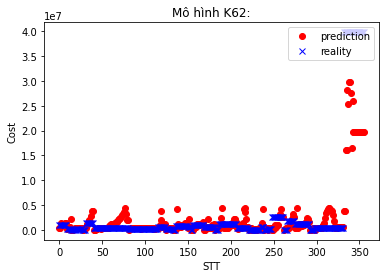

In [ ]:
import matplotlib.pyplot as plt

plt.plot(preds, 'o', color = 'r')
plt.plot(y_test, 'x', color = 'b')
plt.title("Mô hình K62:")
plt.xlabel("STT")
plt.ylabel("Cost")
 
plt.legend(('prediction', 'reality'), loc = 'upper right')
 
plt.show()